# Basic Table Extraction

PDFs often contain tables, and `natural-pdf` provides methods to extract their data. The key is to first triangulate where your table is on the page, then use powerful extraction tools on that specific region.

Let's extract the "Violations" table from our practice PDF.

In [1]:
#%pip install natural-pdf  # core install already includes pdfplumber

## Method 1 – pdfplumber (default)

In [2]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# For a single table, extract_table returns list-of-lists
table = page.extract_table(method="pdfplumber")
table  # List-of-lists of cell text

CropBox missing from /Page, defaulting to MediaBox


TableResult(rows=8…)

`extract_table()` defaults to the **plumber** backend, so the explicit `method` is optional—but it clarifies what's happening.

## Method 2 – TATR-based extraction

When you do a TATR layout analysis, it detects tables, rows and cells with a LayoutLM model. Once a region has `source="detected"` and `type="table"`, calling `extract_table()` on that region uses the **tatr** backend automatically.

CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox


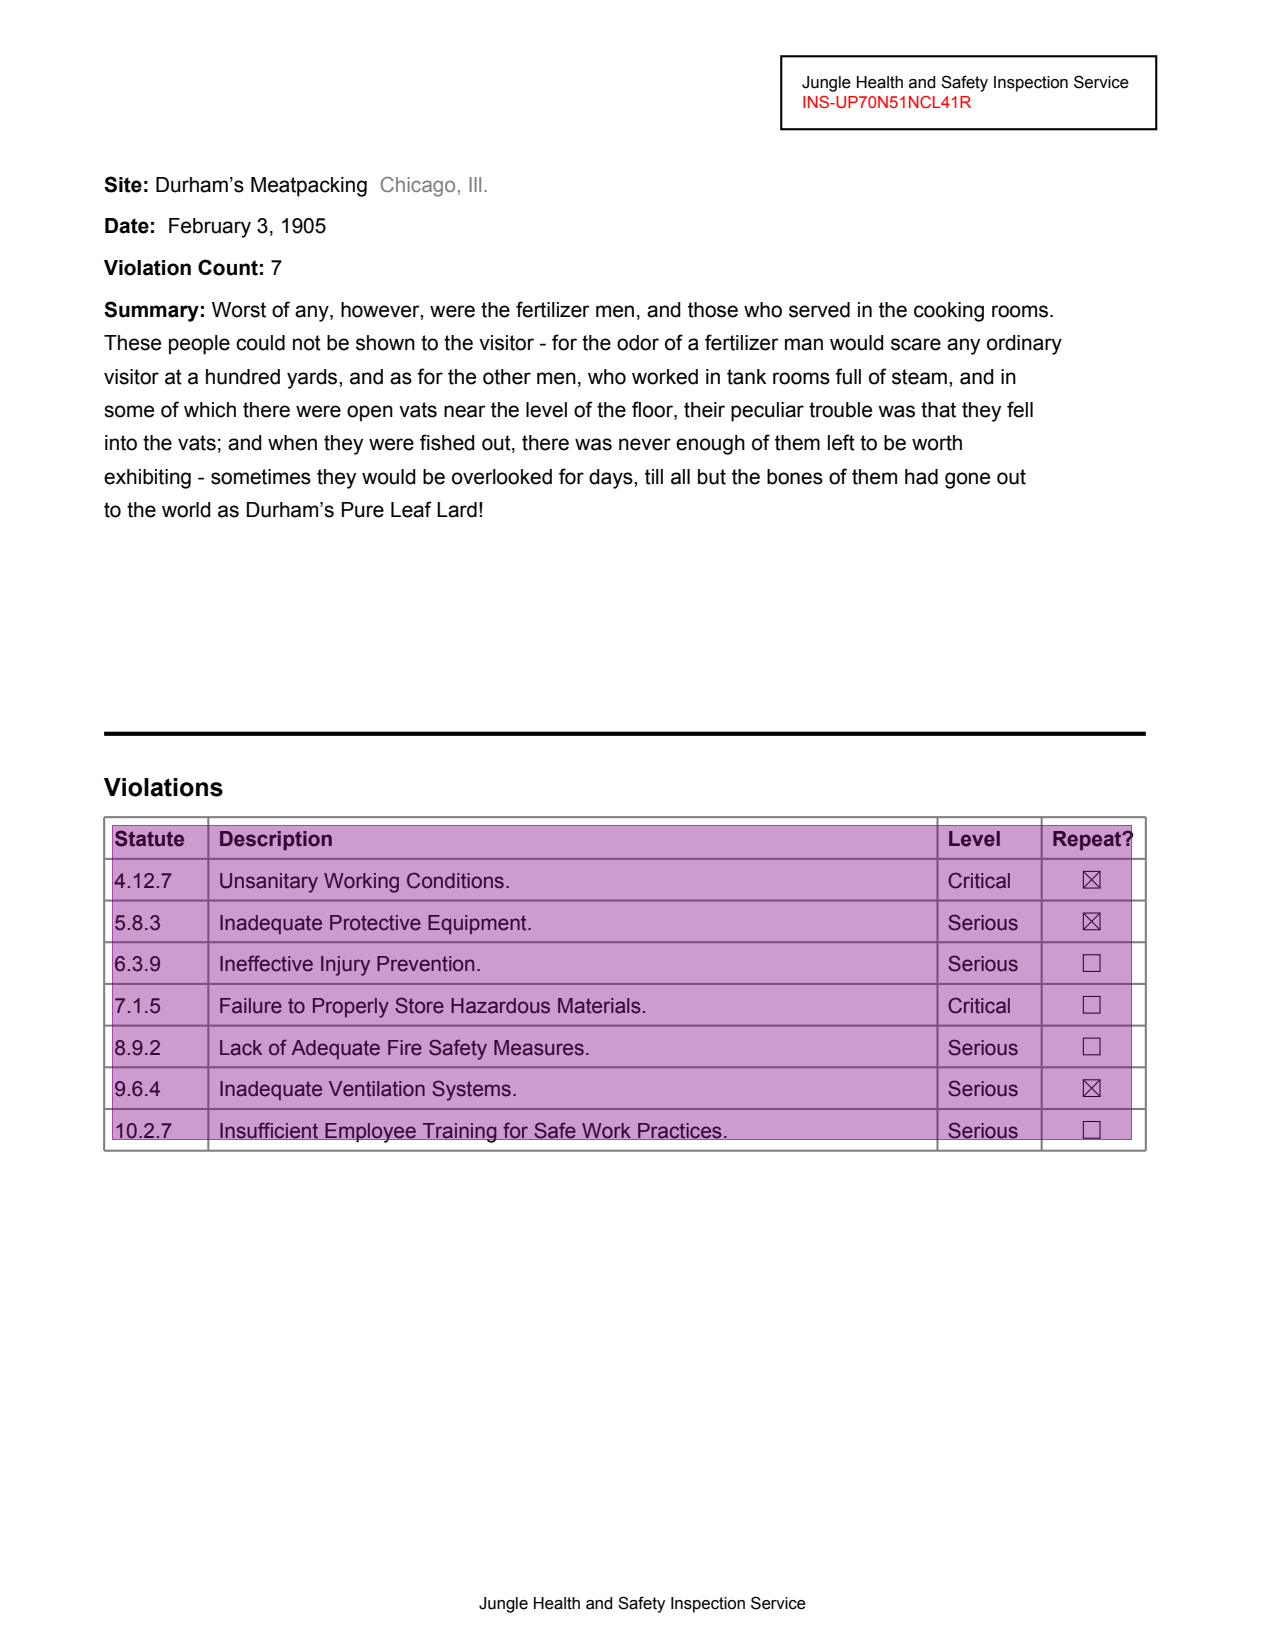

In [3]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Detect layout with Table Transformer
page.analyze_layout(engine="tatr")

# Grab the first detected table region
table_region = page.find('region[type=table]')

table_region.show(label="TATR Table", color="purple")

In [4]:
tatr_rows = table_region.extract_table()  # Uses TATR backend implicitly

## Method 3 – PaddleOCR Layout

You can also try PaddleOCR's layout detector to locate tables:

In [5]:
page.clear_detected_layout_regions()
page.analyze_layout(engine="paddle", confidence=0.3)

paddle_table = page.find('region[type=table]')
if paddle_table:
    paddle_table.show(color="green", label="Paddle Table")
    paddle_rows = paddle_table.extract_table(method="pdfplumber")  # fall back to ruling-line extraction inside the region

/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('UVDoc', None)


Using official model (UVDoc), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-DocBlockLayout', None)


Using official model (PP-DocBlockLayout), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-DocLayout_plus-L', None)


Using official model (PP-DocLayout_plus-L), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_table_cls', None)


Using official model (PP-LCNet_x1_0_table_cls), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('SLANeXt_wired', None)


Using official model (SLANeXt_wired), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('SLANet_plus', None)


Using official model (SLANet_plus), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('RT-DETR-L_wired_table_cell_det', None)


Using official model (RT-DETR-L_wired_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('RT-DETR-L_wireless_table_cell_det', None)


Using official model (RT-DETR-L_wireless_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-Chart2Table', None)


Using official model (PP-Chart2Table), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/config.json


Loading weights file /Users/soma/.paddlex/official_models/PP-Chart2Table/model_state.pdparams


Loaded weights file from disk, setting weights to model.


All model checkpoint weights were used when initializing PPChart2TableInference.



All the weights of PPChart2TableInference were initialized from the model checkpoint at /Users/soma/.paddlex/official_models/PP-Chart2Table.
If your task is similar to the task the model of the checkpoint was trained on, you can already use PPChart2TableInference for predictions without further training.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/generation_config.json


Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

---

### Choosing the right backend

* **plumber** – fastest; needs rule lines or tidy whitespace.
* **tatr** – robust to missing lines; slower; requires AI extra.
* **text** – whitespace clustering; fallback when lines + models fail.

You can call `page.extract_table(method="text")` or on a `Region` as well.

The general workflow is: try different layout analyzers to locate your table, then extract from the specific region. Keep trying options until one works for your particular PDF!

For complex grids where even models struggle, see Tutorial 11 (enhanced table processing) for a lines-first workflow.

## TODO

* Compare accuracy/time of the three methods on the sample PDF.
* Show how to call `page.extract_table(method="text")` as a no-dependency fallback.
* Add snippet exporting `rows` to pandas DataFrame.
* Demonstrate cell post-processing (strip %, cast numbers).